In [0]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

In [0]:
# ワインデータセットの読み込み
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

df = df[44:71]

# 特徴量に色（10列）とプロリンの量(13列)を選択
X = df.iloc[:,[10,13]].values
# 正解ラベルの設定(ラベルはゼロから開始するようマイナス1する)
y = df.iloc[:, 0].values -1

# 特徴量の標準化
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [3]:
# ハードマージン（ハードマージン）のモデルを作成
model = LinearSVC(loss='hinge', C=10000.0, multi_class='ovr', penalty='l2', random_state=0)

# モデルの訓練
model.fit(X_std, y)

LinearSVC(C=10000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)

In [4]:
model.coef_[0] #パラメータw

array([-1.49886841, -2.32824189])

In [5]:
model.intercept_[0] #パラメータb

-1.1834780379505823

In [0]:
# 決定境界用の変数X_pltを作成
X_plt = np.linspace(-3, 3, 200)[:, np.newaxis]

# 決定境界の作成
w = model.coef_[0]
b = model.intercept_[0]
decision_boundary = -w[0]/w[1] * X_plt - b/w[1]

# 決定境界の上下にマージン作成
margin = 1/w[1]
margin_up = decision_boundary + margin
margin_down = decision_boundary - margin

<function matplotlib.pyplot.show>

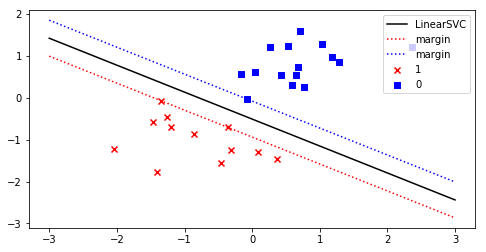

In [7]:
plt.figure(figsize=(8,4)) #プロットのサイズ指定

# 決定境界、マージンのプロット
plt.plot(X_plt, decision_boundary, linestyle = "-",  color='black', label='LinearSVC')
plt.plot(X_plt, margin_up, linestyle = ":", color='red', label='margin')
plt.plot(X_plt, margin_down, linestyle = ":",color='blue', label='margin')

# 訓練データの散布図
plt.scatter(X_std[:, 0][y==1], X_std[:, 1][y==1], c='r', marker='x', label='1')
plt.scatter(X_std[:, 0][y==0], X_std[:, 1][y==0], c='b', marker='s', label='0')
plt.legend(loc='best')

plt.show

In [8]:
# LinearSVC（ソフトマージン）のモデルを作成
model2 = LinearSVC(loss='hinge', C=1.0, multi_class='ovr', penalty='l2', random_state=0)

# モデルの訓練
model2.fit(X_std, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=0, tol=0.0001, verbose=0)

In [0]:
# 決定境界の作成
w = model2.coef_[0]
b = model2.intercept_[0]
decision_boundary2 = -w[0]/w[1] * X_plt - b/w[1]

# 決定境界の上下にマージン作成
margin2 = 1/w[1]
margin_up2 = decision_boundary2 + margin2
margin_down2 = decision_boundary2 - margin2

<function matplotlib.pyplot.show>

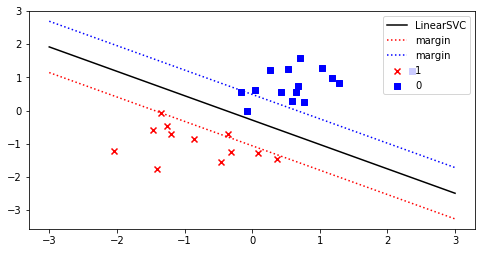

In [10]:
plt.figure(figsize=(8,4)) #プロットのサイズ指定

# 決定境界、マージンのプロット
plt.plot(X_plt, decision_boundary2, linestyle = "-",  color='black', label='LinearSVC')
plt.plot(X_plt, margin_up2, linestyle = ":", color='red', label='margin')
plt.plot(X_plt, margin_down2, linestyle = ":",color='blue', label='margin')

# 訓練データの散布図
plt.scatter(X_std[:, 0][y==1], X_std[:, 1][y==1], c='r', marker='x', label='1')
plt.scatter(X_std[:, 0][y==0], X_std[:, 1][y==0], c='b', marker='s', label='0')
plt.legend(loc='best')

plt.show